# Chemical Reactions

$$\require{mhchem}$$

Since version 4, it is possible to model chemical reactions with CADET using mass action law type reactions (see [Reaction models](https://cadet.github.io/master/modelling/reactions.html#reaction-models)).
The mass action law states that the speed of a reaction is proportional to the product of the concentrations of their reactants.

In CADET-Process, a reaction module was implemented to facilitate the setup of these reactions.
There are two different classes: the `MassActionLaw` which is used for bulk phase reactions, as well as `MassActionLawParticle` which is specifically designed to model reactions in particle pore phase.

In this tutorial, we're going to learn how to setup:
- Forward Reactions
- Equilibrium Reactions

## Forward Reactions
As a simple example, consider the following system:

$$
\ce{1 A ->[k_{AB}] 1 B}
$$

First, initiate a `ComponentSystem` with components `A` and `B`.

In [1]:
from CADETProcess.processModel import ComponentSystem
component_system = ComponentSystem(['A', 'B'])

Then, configure the `MassActionLaw` reaction model.
To instantiate it, pass the `ComponentSystem`.
Then, add the reaction using the `add_reaction` method.
The following arguments are expected:
- indices: The indices of the components that take part in the reaction (useful for bigger systems)
- stoichiometric coefficients in the order of the indices
- forward reaction rate
- backward reaction rate

In [2]:
from CADETProcess.processModel import MassActionLaw
reaction_system = MassActionLaw(component_system) 
reaction_system.add_reaction(
    indices=[0,1], 
    coefficients=[-1, 1],
    k_fwd=0.1,
    k_bwd=0
)

To demonstrate this reaction, a `Cstr` is instantiated and the reaction is added to the tank.
Moreover, the initial conditions are set.
In principle, the `Cstr` supports reactions in bulk and particle pore phase.
Since the porosity is $1$ by default, only the bulk phase is considered.


In [3]:
from CADETProcess.processModel import Cstr

reactor = Cstr(component_system, 'reactor')
reactor.bulk_reaction_model = reaction_system
reactor.V = 1e-6
reactor.c = [1.0, 0.0]

Now, the reactor is added to a `FlowSheet` and a `Process` is set up.
Here, the `FlowSheet` only consists of a single `Cstr`, and there are no `Events` in the process.

In [4]:
from CADETProcess.processModel import FlowSheet
flow_sheet = FlowSheet(component_system)
flow_sheet.add_unit(reactor)

from CADETProcess.processModel import Process
process = Process(flow_sheet, 'reaction_demo')
process.cycle_time = 100

After simulation, the results can be plotted:

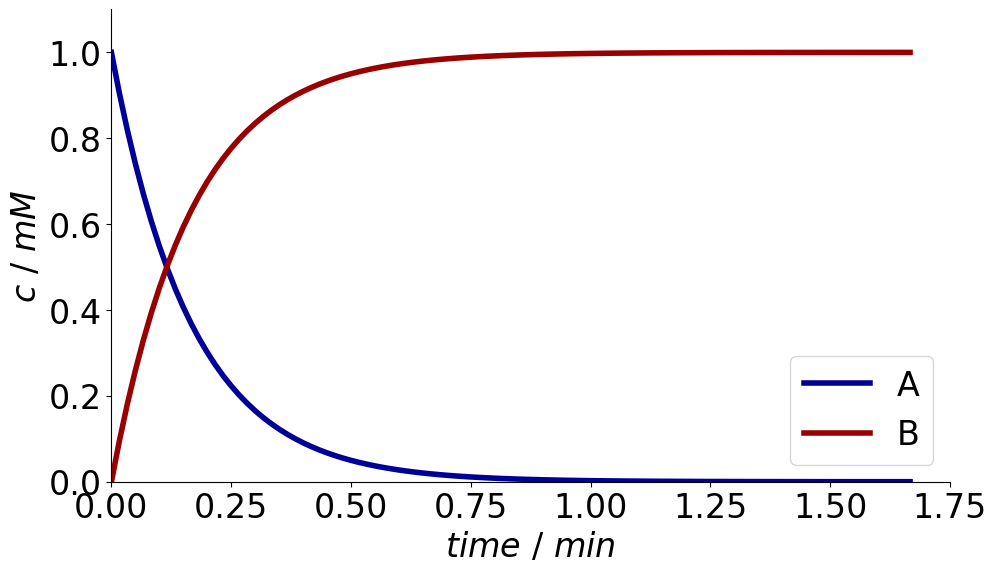

In [5]:
from CADETProcess.simulator import Cadet
simulator = Cadet()
sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()

## Equilibrium Reactions
It is also possible to consider equilibrium reactions where the product can react back to the educts.

$$
\ce{ 2 A <=>[k_{AB}][k_{BA}] B}
$$

Here, the same units, flow sheet, and process are reused which were defined above.

In [6]:
reaction_system = MassActionLaw(component_system) 
reaction_system.add_reaction(
    indices=[0,1], 
    coefficients=[-2, 1],
    k_fwd=0.2,
    k_bwd=0.1
)

reactor.bulk_reaction_model = reaction_system

After simulation, the results can be plotted:

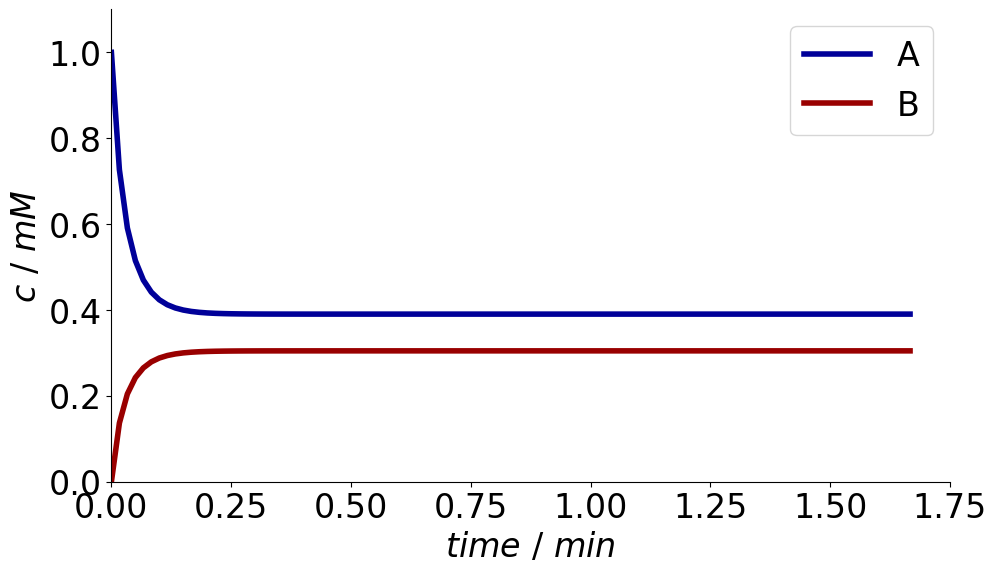

In [7]:
sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()